In [150]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from scipy.stats import norm

# Question 1 [10 marks]

The following function *returns* have inputs given by

(i) stock = a list of stock tickers e.g. ['WIKI/AIG', 'WIKI/C']. The list can be of any length;

(ii) start_date;

(iii) end_date.

The output of the function is a pandas DataFrame with 
daily (arithmetic) returns for each of the stock based on the Adj. Close price downloaded from quandl. 


In [151]:
def returns(stocks, start_date, end_date):
    quandl.ApiConfig.api_key = "nzmUup2qN7ccgJAKEcK1"
    raw  = quandl.get(stocks, \
                  start_date = start_date, \
                  end_date = end_date, \
                  transformation = 'rdiff')
    return raw[list(raw.columns\
                         [raw.columns.str.contains('Adj. Close')])]

**(a)** Implement the *returns* function using the stocks and dates given below:

"WIKI/TSLA", "WIKI/WMT", "WIKI/AIG"

start date = 1st Jan 2015

end date = 1st Jan 2018

In [152]:
# Answer

# your codes here

stocks_list = ["WIKI/TSLA", "WIKI/WMT", "WIKI/AIG"]
start_date = "2015-01-01"
end_date = "2018-01-01"

returns_data = returns(stocks_list, start_date, end_date)
print(returns_data)

            WIKI/TSLA - Adj. Close  WIKI/WMT - Adj. Close  \
Date                                                        
2015-01-05               -0.042041              -0.002910   
2015-01-06                0.005664               0.007706   
2015-01-07               -0.001562               0.026532   
2015-01-08               -0.001588               0.021106   
2015-01-09               -0.018778              -0.012380   
...                            ...                    ...   
2017-12-22               -0.019478               0.001530   
2017-12-26               -0.024323               0.009673   
2017-12-27               -0.017807               0.001008   
2017-12-28                0.011937               0.001410   
2017-12-29               -0.012716              -0.006539   

            WIKI/AIG - Adj. Close  
Date                               
2015-01-05              -0.019783  
2015-01-06              -0.014182  
2015-01-07               0.004795  
2015-01-08              -0

**(b)** Write a function called *portfolio* with the following inputs:

(i) the returns (output by the *returns* function above);

(ii) the positions (in dollars) in respective stocks.

The output of the function is a pandas DataFrame with a single column of PnLs indexed by the dates of the returns.

In [153]:
# Answer

def portfolio(returns, positions):
    
    positions_series = pd.Series(positions, index=returns.columns)

    # Calculate daily PnL for each stock
    pnl_per_stock = returns * positions_series

    # Calculate total PnL for each day
    total_pnl = pnl_per_stock.sum(axis=1)

    # Create a DataFrame with PnL column indexed by dates
    pnl_df = pd.DataFrame(total_pnl, columns=['PnL'])
    
    return pnl_df # your codes here

**(c)** Implement the *portfolio* function using the returns in Q1(a) with the following positions in the stocks:

(i) $\$10, 000$ in "WIKI/TSLA"

(ii) $\$20, 000$ in "WIKI/WMT"

(iii) $\$30, 000$ in "WIKI/AIG"

In [154]:
# Answer 
positions= [10000, 20000, 30000]

# Calculate portfolio PnL
portfolio_pnl = portfolio(returns_data, positions)

# Display the result
print(portfolio_pnl)

                    PnL
Date                   
2015-01-05 -1072.093782
2015-01-06  -214.696567
2015-01-07   658.884619
2015-01-08   274.082765
2015-01-09  -944.228842
...                 ...
2017-12-22  -548.671621
2017-12-26    10.926082
2017-12-27  -102.373600
2017-12-28   379.354203
2017-12-29  -467.940974

[753 rows x 1 columns]


**(d)** Plot the PnLs obtained in Q1(c).

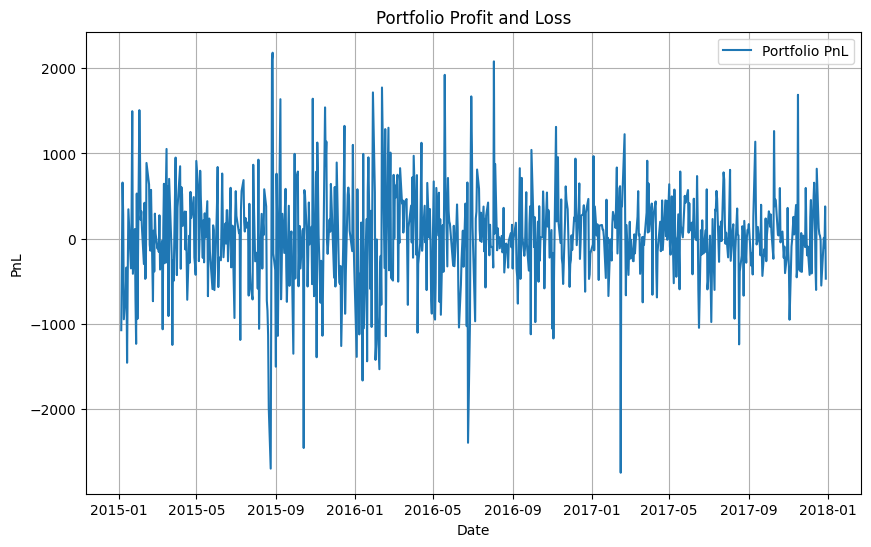

In [155]:
# Answer 

# your codes here

plt.figure(figsize=(10, 6))
plt.plot(portfolio_pnl.index, portfolio_pnl['PnL'], label='Portfolio PnL')
plt.title('Portfolio Profit and Loss')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.legend()
plt.grid(True)
plt.show()

# Question 2 [20 marks]

**(a)** Using the most recent 250-day observations, write a code to compute the (daily) $95\%$ simple Historical Simulation VaR for your portfolio in Q1(d).

In [156]:
# Answer 

# your codes here

# Set the number of days for historical simulation
window_size = 250

# Select the most recent 250-day observations
historical_data = returns_data.iloc[-window_size:]

# Calculate daily PnL for each day
daily_pnl = np.dot(historical_data.values, positions)

# Calculate VaR at 95% confidence level
var_95 = np.percentile(daily_pnl, 5)

# Print the VaR
print(f"The 95% VaR for the portfolio is: {var_95:.2f}")

The 95% VaR for the portfolio is: -599.92


**(b)** Using the most recent 250-day observations, write a code to compute the (daily) $95\%$ volatility-adjusted VaR for your portfolio in Q1(d).

In [157]:
# Answer 

# your codes here
#assume normal distribution
# Set the confidence level
confidence_level = 0.95

# Calculate daily portfolio returns using the most recent 250-day observations
daily_returns = returns_data.iloc[-window_size:]

# Calculate daily PnL for each day
daily_pnl = np.dot(daily_returns.values, positions)

# Calculate the portfolio volatility
portfolio_volatility = np.std(daily_pnl)

# Calculate the z-score for the given confidence level
z_score = np.percentile(np.random.normal(size=100000), 100 * (1 - confidence_level))

# Calculate the VaR with volatility adjustment
var_vol_adjusted = -z_score * portfolio_volatility

# Print the result
print(f"The daily 95% volatility-adjusted VaR for the portfolio is: {var_vol_adjusted:.2f}")


The daily 95% volatility-adjusted VaR for the portfolio is: 720.24


**(c)** Plot the conditional volatilities predicted by GARCH(1,1) in the VaR model in Q2(b) for each stock in the portfolio.

c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004963. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\liuzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001318. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\liuzu\A

<Axes: title={'center': 'GARCH(1,1) Conditional Volatility for Each Stock'}, xlabel='Date'>

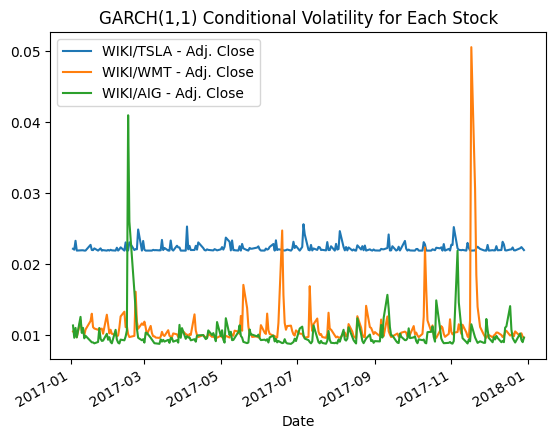

In [158]:
import arch
# Function to compute GARCH(1,1) volatility for each stock
def garch_volatility(stock_returns):
    model = arch.arch_model(stock_returns, vol='Garch', p=1, q=1)
    results = model.fit(disp='off')
    return results.conditional_volatility

# Initialize a DataFrame to store GARCH volatility for each stock
garch_volatility_df = pd.DataFrame()

# Loop through each stock in the portfolio
for stock in daily_returns.columns:
    stock_returns = daily_returns[stock]
    stock_garch_volatility = garch_volatility(stock_returns)
    garch_volatility_df[stock] = stock_garch_volatility

# Plot the conditional volatilities
garch_volatility_df.plot(title='GARCH(1,1) Conditional Volatility for Each Stock')


**(d)** Suppose I have $\$60,000$ to invest in the three stocks given in Q1. Find a set of positions that produces a volatility-adjusted VaR smaller than 500, based on the most recent 250-day observations. Some trial and error may be required. Answers may not be unique. 

In [168]:


# Set the confidence level
confidence_level = 0.95

# Total available funds
total_funds = 60000

# Target volatility-adjusted VaR
target_var = 500

# Initialize variables
best_positions = None
smallest_var = float('inf')

# Perform a systematic search for positions
for position1 in range(0, total_funds + 1, 5000):
    for position2 in range(0, total_funds - position1 + 1, 5000):
        position3 = total_funds - position1 - position2

        positions = [position1, position2, position3]

        # Calculate daily PnL for each day
        daily_pnl = np.dot(daily_returns.values, positions)

        # Calculate portfolio volatility
        portfolio_volatility = np.std(daily_pnl)

        # Calculate the volatility-adjusted VaR
        var_vol_adjusted = - np.percentile(daily_pnl, 100 * (1 - confidence_level))
        var_volatility_adjusted = var_vol_adjusted / portfolio_volatility

        # Check if the current set of positions produces a smaller volatility-adjusted VaR
        if var_volatility_adjusted < target_var and var_volatility_adjusted < smallest_var:
            smallest_var = var_volatility_adjusted
            best_positions = positions

# Print the result
print(f"Best positions: {best_positions}")
print(f"Smallest volatility-adjusted VaR: {smallest_var:.2f}")


Best positions: [5000, 40000, 15000]
Smallest volatility-adjusted VaR: 1.07


**(a)** Write a function called *backtest* which inputs:

(i) the daily PnL (given in a DataFrame);

(ii) the testing window $T$;

(iii) the estimation window $E$;

(iv) the confidence level of a simple Historical Simulations VaR

and outputs

(v) the plot of PnL and $-1$*(forcasted VaRs) during the testing period;

(vi) the number of exceptions $x$.

The PnLs for the testing will consist of the most recent obersevations. 

In [198]:

def backtest(data, T, E, VaR_cl):
    exceptions = 0
    
    # Calculate VaR using Historical Simulation
    var_values = data['PnL'].rolling(window=E).quantile(1 - VaR_cl)
    
    # Extract the most recent observations for testing
    testing_data = data.iloc[-T:]
    
    # Plot PnL and forecasted VaRs during the testing period
    plt.figure(figsize=(10, 6))
    plt.plot(testing_data.index, testing_data['PnL'], label='PnL', color='blue')
    plt.plot(testing_data.index, var_values.iloc[-T:], label=f'VaR ({VaR_cl*100:.2f}%)', linestyle='--', color='red')
    plt.title('Backtest: PnL and VaR Forecast')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.show()

    # Count exceptions in testing period
    exceptions = np.sum(data['PnL'] < var_values.iloc[-T])

    return exceptions




**(b)** Apply the *backtest* function in Q3(a) to compute the number of exceptions based on the 95% simple Historical Simulation VaR using the PnL in Q1(d) with 

(i) Testing window $=250$ days
(ii) Estimation window $=250$ days

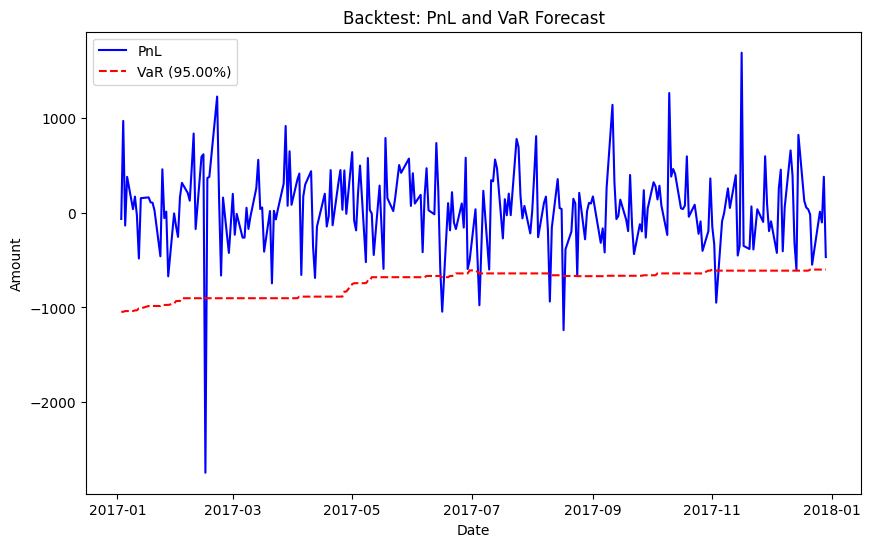

33


In [199]:
T = 250
E = 250
VaR_cl = 0.95
data= portfolio_pnl
exceptions = backtest(data, T, E, VaR_cl)
print(exceptions)


**(c)** Write a function called *decision* that outputs
"1" to reject or "0" to not reject
the null hypothesis that the model is correctly calibrated. The number of exceptions is assumed to follow the binomial distribution. 

The inputs of the function are

(i) x = no. of exceptions

(ii) VaR_cl = confidence level of VaR

(iii) T = sample size (Testing window)

(iv) test_cl = confidence level of the (two-tailed) Hypothesis testing

In [162]:
# Answer
import scipy.stats as stats
def decision(VaR_cl, x, T, test_cl):
    # Calculate the critical value for a two-tailed test
    alpha = 1 - test_cl
    critical_value = stats.binom.ppf([alpha / 2, 1 - alpha / 2], T, VaR_cl / 100)

    # Perform the hypothesis test
    if x < critical_value[0] or x > critical_value[1]:
        # Reject the null hypothesis
        return 1
    else:
        # Do not reject the null hypothesis
        return 0

**(d)** Use the function in Q3(c) to decide if we can reject the 95% VaR model given in Q3(b).

In [163]:
# Answer

# your codes here
VaR_cl = 95
exceptions = 10
T = 250
test_cl = 0.95

result = decision(VaR_cl, exceptions, T, test_cl)
print(f"Decision: {result}")

Decision: 1


#Reject Null hypothesis